# Invariant mass exercise

This notebook make use of a subset of 2010 CMS collision data released a Open Data:

* McCauley, T. (2014). Dimuon event information derived from the Run2010B public Mu dataset. CERN Open Data Portal. DOI: [10.7483/OPENDATA.CMS.CB8H.MFFA](http://opendata.cern.ch/record/700).

The file we are using contains about 10000 $\mu\mu$ events recorded in 2010. Each line corresponds to an event, and present the kinematical information about the recorded muon pair:

`Run,Event,E1,px1 ,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M`

Each muon candidate is characterised by:

- `E`: energy
- `px,py,pz`: momentum components
- `pt,eta,phi`: tranverse momentum, pseudorapidity, azimuthal angle
- `Q`: electrical charge

In [8]:
import ROOT

Let's begin by reading in the data as a ROOT TTree. This step might take a while: be patient!

In [9]:
inputFileName = "MuRun2010B_Clean.csv"

In [16]:
dimuons = ROOT.TTree("MuonPairs","MuonPairs")
dimuons.ReadFile(inputFileName)
#dimuons.Print()

100000

## 1. Plot the dimuon invariant mass spectrum

We begin by creating an histogram to hold the invariant mass values:

In [11]:
invMass = ROOT.TH1F("invMass","CMS Opendata: #mu#mu mass;#mu#mu mass [GeV];Events",512, 2, 110)

Warning in <TROOT::Append>: Replacing existing TH1: invMass (Potential memory leak).


In order to loop on the TTree rows, we use the [TTree::Draw](https://root.cern.ch/doc/master/classTTree.html) method: this is the most straightforward way in which you can loop on a N-tuple in ROOT (but not the only one!). 

First we define the formula for the invariant mass of the muon pair:

$$ m_{\mu\mu} = \sqrt{ (E_1 + E_2)^2 - (\vec{p}_1 + \vec{p}_2 +)^2}$$

In [12]:
invMassFormula = "sqrt((E1 + E2)^2 - ((px1 + px2)^2 + (py1 + py2)^2 + (pz1 + pz2)^2))"

Then we define a selection for the events. In this simple esemple, we require that the muons in the pair have opposite electricla charge:

In [13]:
selection = "Q1*Q2==-1"

Now we loop with `TTree::Draw()` and store the result into the `invMass` histogram, then we plot it.

**What can you observe in the resulting invariant mass spectrum? How many peaks can you see?**

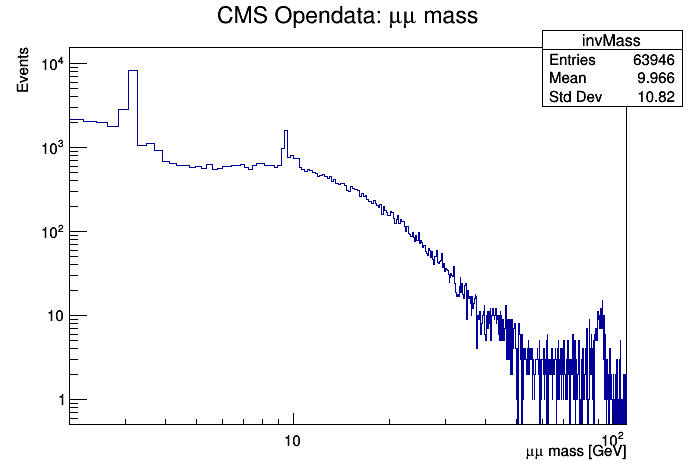

In [15]:
c = ROOT.TCanvas()

dimuons.Draw(invMassFormula + " >> invMass",selection,"hist")

c.SetLogx()
c.SetLogy()
c.Draw()

## 2. Modify the code to isolate the $J/\Psi$ and the $Z$ peaks

Below there's an example of how esplicitely to loop on a `TTree` without using the `TTree::Draw()` method that we used before: using this direct approach facilitates the inclusion of specific selections on the data properties. The code below reproduced what we just did with this new approach: add any histogram you might need, and any specific selection/logic to fill it...

In [19]:
from math import sqrt

invMass = ROOT.TH1F("invMass","CMS Opendata: #mu#mu mass;#mu#mu mass [GeV];Events",512, 2, 110)

for e in dimuons: # an esplicit loop on the events. "e" is an event
    if e.Q1 * e.Q2 != -1: # this is the "opposite charge" selection we has before
        continue
    # compute invariant mass
    m = sqrt( (e.E1 + e.E2)**2 - ((e.px1 + e.px2)**2 + (e.py1 + e.py2)**2 + (e.pz1 + e.pz2)**2) )
    invMass.Fill(m)

Warning in <TROOT::Append>: Replacing existing TH1: invMass (Potential memory leak).


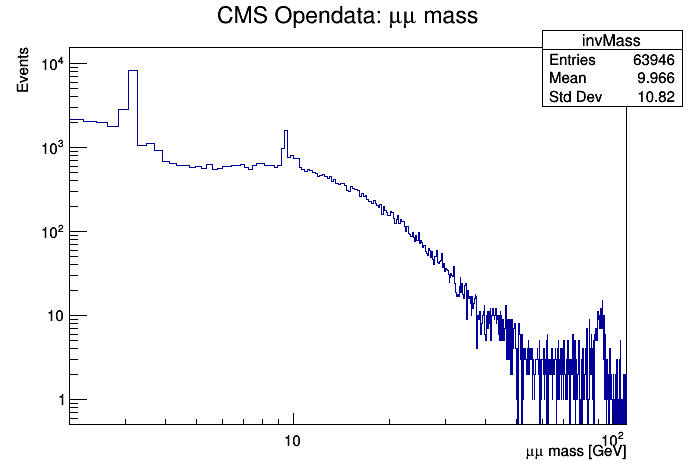

In [20]:
c = ROOT.TCanvas()
invMass.Draw()
c.SetLogx()
c.SetLogy()
c.Draw()